In [10]:
import os
os.environ["OMP_NUM_THREADS"] = "1"


✅ Dataset Loaded Successfully

📄 Columns present in dataset:
['CustomerID', 'Genre', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'] 



,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40



ℹ️ Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


None

🔍 Detected possible gender column(s): ['Genre']



C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Window

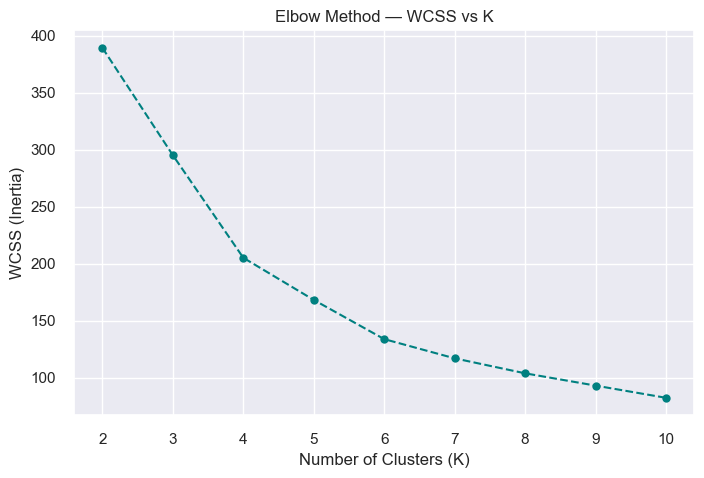

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Window


📈 Silhouette Scores:


C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


2     0.335472
3     0.357793
4     0.403958
5     0.416643
6     0.428417
7     0.417232
8     0.408207
9     0.417693
10    0.406554
Name: Silhouette Score, dtype: float64

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(



✅ Best K by Silhouette Score: 6


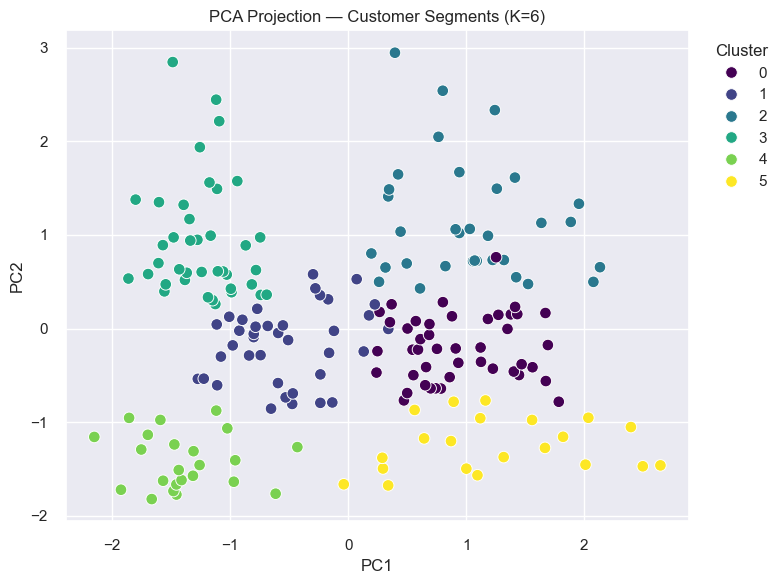

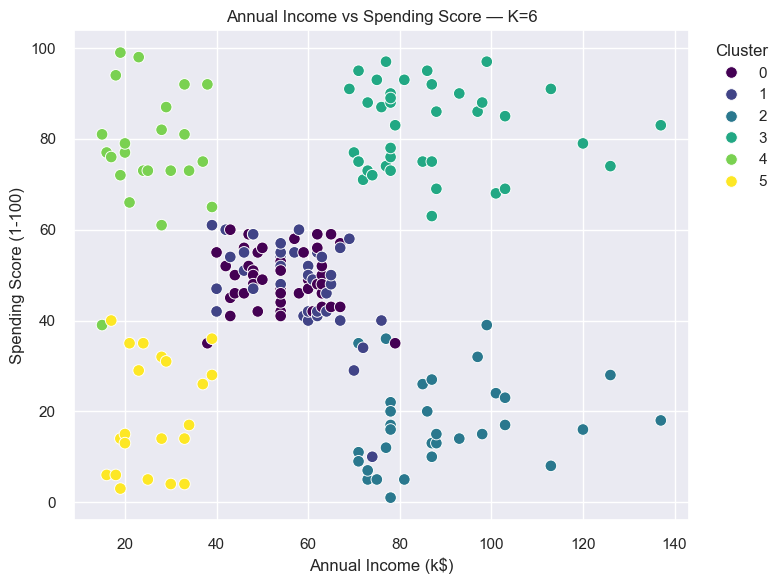


📊 Cluster Profiling Summary:


,Cluster,Count,Age (mean),Annual Income (k$) (mean),Spending Score (1-100) (mean),Age (median),Annual Income (k$) (median),Spending Score (1-100) (median)
0,0,45,56.333333,54.266667,49.066667,54.000000,54.000000,49.000000
1,1,39,26.794872,57.102564,48.128205,26.000000,60.000000,50.000000
2,2,33,41.939394,88.939394,16.969697,43.000000,86.000000,16.000000
3,3,39,32.692308,86.538462,82.128205,32.000000,79.000000,83.000000
4,4,23,25.000000,25.260870,77.608696,23.000000,24.000000,77.000000
5,5,21,45.523810,26.285714,19.380952,46.000000,25.000000,15.000000



💾 Saved Final Clustered Data → mall_customers_kmeans_labeled.csv


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,0,19,15,39,4
1,2,0,21,15,81,4
2,3,1,20,16,6,5
3,4,1,23,16,77,4
4,5,1,31,17,40,5


In [11]:
# Mall Customers — K-Means Clustering

# 1️⃣ Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

# Plot settings
plt.style.use("seaborn-v0_8")
sns.set(rc={"figure.figsize": (8,5)}, font_scale=1.0)

# 2️⃣ Load data
df = pd.read_csv("Mall_Customers.csv")

print("✅ Dataset Loaded Successfully\n")
print("📄 Columns present in dataset:")
print(df.columns.tolist(), "\n")

display(df.head())
print("\nℹ️ Info:")
display(df.info())

# 3️⃣ Check for 'Gender' column name variants
# Clean column names: strip spaces
df.columns = df.columns.str.strip()

# Try to find a column similar to 'Gender'
possible_gender_cols = [col for col in df.columns if 'gender' in col.lower() or 'genre' in col.lower()]
print(f"🔍 Detected possible gender column(s): {possible_gender_cols}\n")

if possible_gender_cols:
    gender_col = possible_gender_cols[0]
    df["Gender"] = df[gender_col].map({"Male": 0, "Female": 1})
else:
    print("⚠️ No Gender column found — skipping encoding.")
    df["Gender"] = np.nan  # just placeholder if missing

# Store IDs
possible_id_cols = [col for col in df.columns if 'id' in col.lower()]
customer_id_col = possible_id_cols[0] if possible_id_cols else None

if customer_id_col:
    customer_ids = df[customer_id_col]
else:
    raise KeyError("❌ No 'CustomerID' column found — check your CSV file.")

# 4️⃣ Feature selection
feature_cols = ["Age", "Annual Income (k$)", "Spending Score (1-100)"]
for col in feature_cols:
    if col not in df.columns:
        raise KeyError(f"❌ Missing expected column: {col}. Please check the dataset headers.")
X_sel = df[feature_cols].copy()

# 5️⃣ Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_sel)

# 6️⃣ Elbow Method
wcss = []
K_range = range(2, 11)
for k in K_range:
    km = KMeans(n_clusters=k, init="k-means++", random_state=42, n_init=10)
    km.fit(X_scaled)
    wcss.append(km.inertia_)

plt.figure()
plt.plot(K_range, wcss, marker="o", linestyle="--", color="teal")
plt.title("Elbow Method — WCSS vs K")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("WCSS (Inertia)")
plt.show()

# 7️⃣ Silhouette Scores
sil_scores = {}
for k in K_range:
    km = KMeans(n_clusters=k, init="k-means++", random_state=42, n_init=10)
    labels = km.fit_predict(X_scaled)
    sil = silhouette_score(X_scaled, labels)
    sil_scores[k] = sil

print("\n📈 Silhouette Scores:")
display(pd.Series(sil_scores, name="Silhouette Score").sort_index())

best_k = max(sil_scores, key=sil_scores.get)
print(f"\n✅ Best K by Silhouette Score: {best_k}")

# 8️⃣ Fit Final Model
kmeans = KMeans(n_clusters=best_k, init="k-means++", random_state=42, n_init=10)
labels = kmeans.fit_predict(X_scaled)

out = df.copy()
out["Cluster"] = labels

# 9️⃣ PCA Visualization
pca = PCA(n_components=2, random_state=42)
pts_2d = pca.fit_transform(X_scaled)

viz = pd.DataFrame({
    "PC1": pts_2d[:, 0],
    "PC2": pts_2d[:, 1],
    "Cluster": labels
})

plt.figure(figsize=(8,6))
sns.scatterplot(
    data=viz, x="PC1", y="PC2", hue="Cluster",
    palette="viridis", s=70, edgecolor="white"
)
plt.title(f"PCA Projection — Customer Segments (K={best_k})")
plt.legend(title="Cluster", bbox_to_anchor=(1.02, 1), loc="upper left")
plt.tight_layout()
plt.show()

# 🔟 Classic Income–Spend Visualization
plt.figure(figsize=(8,6))
sns.scatterplot(
    x=X_sel["Annual Income (k$)"], 
    y=X_sel["Spending Score (1-100)"],
    hue=labels, palette="viridis", s=70, edgecolor="white"
)
plt.title(f"Annual Income vs Spending Score — K={best_k}")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.legend(title="Cluster", bbox_to_anchor=(1.02, 1), loc="upper left")
plt.tight_layout()
plt.show()

# 1️⃣1️⃣ Cluster Profiling
profile_mean = out.groupby("Cluster")[feature_cols].mean().add_suffix(" (mean)")
profile_median = out.groupby("Cluster")[feature_cols].median().add_suffix(" (median)")
profile_count = out.groupby("Cluster").size().to_frame("Count")

profile = pd.concat([profile_count, profile_mean, profile_median], axis=1).reset_index()

print("\n📊 Cluster Profiling Summary:")
display(profile.style.background_gradient(cmap="Blues"))

# 1️⃣2️⃣ Save Final Labeled Dataset
cols_to_save = [customer_id_col, "Gender"] + feature_cols + ["Cluster"]
out_final = out[cols_to_save]
out_final.to_csv("mall_customers_kmeans_labeled.csv", index=False)

print("\n💾 Saved Final Clustered Data → mall_customers_kmeans_labeled.csv")
display(out_final.head())


✅ Dataset Loaded Successfully

📄 Columns present in dataset:
['CustomerID', 'Genre', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'] 



,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40



ℹ️ Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


None

🔍 Detected possible gender column(s): ['Genre']



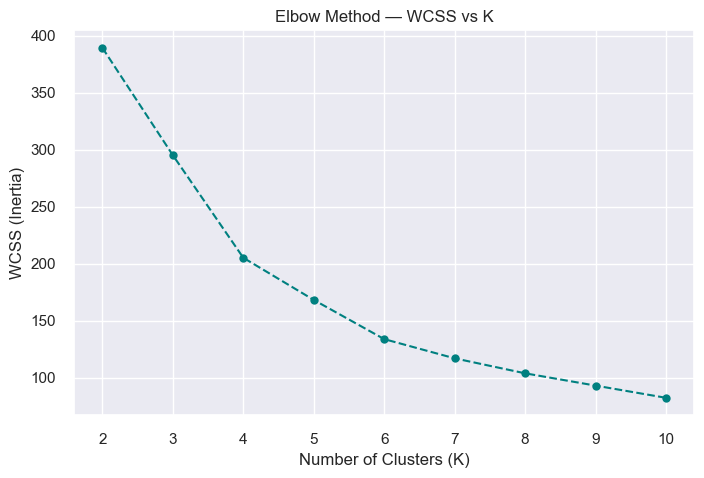


📈 Silhouette Scores:


2     0.335472
3     0.357793
4     0.403958
5     0.416643
6     0.428417
7     0.417232
8     0.408207
9     0.417693
10    0.406554
Name: Silhouette Score, dtype: float64


✅ Best K by Silhouette Score: 6


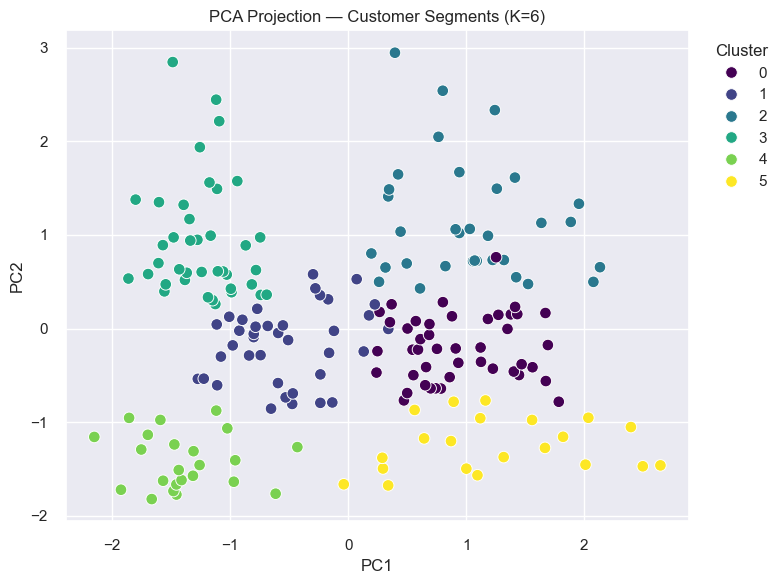

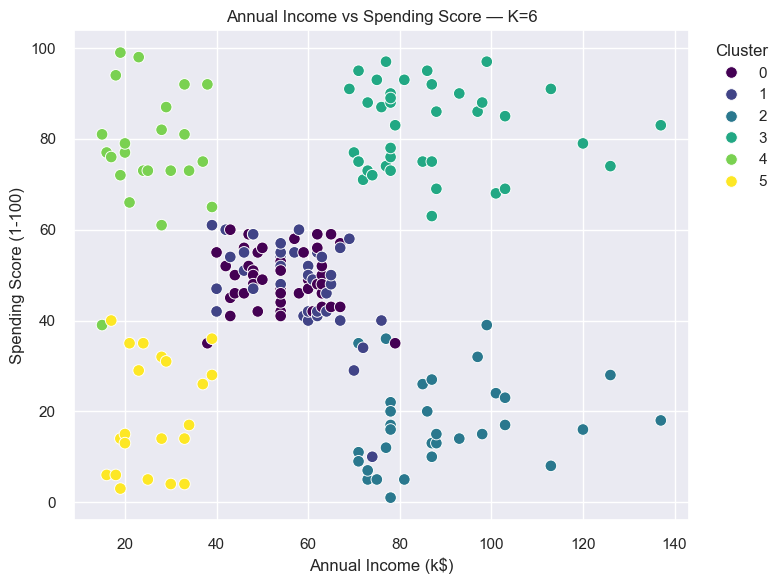


📊 Cluster Profiling Summary:


,Cluster,Count,Age (mean),Annual Income (k$) (mean),Spending Score (1-100) (mean),Age (median),Annual Income (k$) (median),Spending Score (1-100) (median)
0,0,45,56.333333,54.266667,49.066667,54.000000,54.000000,49.000000
1,1,39,26.794872,57.102564,48.128205,26.000000,60.000000,50.000000
2,2,33,41.939394,88.939394,16.969697,43.000000,86.000000,16.000000
3,3,39,32.692308,86.538462,82.128205,32.000000,79.000000,83.000000
4,4,23,25.000000,25.260870,77.608696,23.000000,24.000000,77.000000
5,5,21,45.523810,26.285714,19.380952,46.000000,25.000000,15.000000



💾 Saved Final Clustered Data → mall_customers_kmeans_labeled.csv


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,0,19,15,39,4
1,2,0,21,15,81,4
2,3,1,20,16,6,5
3,4,1,23,16,77,4
4,5,1,31,17,40,5


In [14]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

plt.style.use("seaborn-v0_8")
sns.set(rc={"figure.figsize": (8,5)}, font_scale=1.0)

df = pd.read_csv("Mall_Customers.csv")
print("✅ Dataset Loaded Successfully\n")
print("📄 Columns present in dataset:")
print(df.columns.tolist(), "\n")
display(df.head())
print("\nℹ️ Info:")
display(df.info())

df.columns = df.columns.str.strip()
possible_gender_cols = [col for col in df.columns if 'gender' in col.lower() or 'genre' in col.lower()]
print(f"🔍 Detected possible gender column(s): {possible_gender_cols}\n")
if possible_gender_cols:
    gender_col = possible_gender_cols[0]
    df["Gender"] = df[gender_col].map({"Male": 0, "Female": 1})
else:
    print("⚠️ No Gender column found — skipping encoding.")
    df["Gender"] = np.nan

possible_id_cols = [col for col in df.columns if 'id' in col.lower()]
customer_id_col = possible_id_cols[0] if possible_id_cols else None
if customer_id_col:
    customer_ids = df[customer_id_col]
else:
    raise KeyError("❌ No 'CustomerID' column found — check your CSV file.")

feature_cols = ["Age", "Annual Income (k$)", "Spending Score (1-100)"]
for col in feature_cols:
    if col not in df.columns:
        raise KeyError(f"❌ Missing expected column: {col}. Please check the dataset headers.")
X_sel = df[feature_cols].copy()

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_sel)

wcss = []
K_range = range(2, 11)
for k in K_range:
    km = KMeans(n_clusters=k, init="k-means++", random_state=42, n_init=10)
    km.fit(X_scaled)
    wcss.append(km.inertia_)

plt.figure()
plt.plot(K_range, wcss, marker="o", linestyle="--", color="teal")
plt.title("Elbow Method — WCSS vs K")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("WCSS (Inertia)")
plt.show()

sil_scores = {}
for k in K_range:
    km = KMeans(n_clusters=k, init="k-means++", random_state=42, n_init=10)
    labels = km.fit_predict(X_scaled)
    sil = silhouette_score(X_scaled, labels)
    sil_scores[k] = sil

print("\n📈 Silhouette Scores:")
display(pd.Series(sil_scores, name="Silhouette Score").sort_index())
best_k = max(sil_scores, key=sil_scores.get)
print(f"\n✅ Best K by Silhouette Score: {best_k}")

kmeans = KMeans(n_clusters=best_k, init="k-means++", random_state=42, n_init=10)
labels = kmeans.fit_predict(X_scaled)

out = df.copy()
out["Cluster"] = labels

pca = PCA(n_components=2, random_state=42)
pts_2d = pca.fit_transform(X_scaled)
viz = pd.DataFrame({"PC1": pts_2d[:, 0], "PC2": pts_2d[:, 1], "Cluster": labels})

plt.figure(figsize=(8,6))
sns.scatterplot(data=viz, x="PC1", y="PC2", hue="Cluster", palette="viridis", s=70, edgecolor="white")
plt.title(f"PCA Projection — Customer Segments (K={best_k})")
plt.legend(title="Cluster", bbox_to_anchor=(1.02, 1), loc="upper left")
plt.tight_layout()
plt.show()

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_sel["Annual Income (k$)"], y=X_sel["Spending Score (1-100)"], hue=labels, palette="viridis", s=70, edgecolor="white")
plt.title(f"Annual Income vs Spending Score — K={best_k}")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.legend(title="Cluster", bbox_to_anchor=(1.02, 1), loc="upper left")
plt.tight_layout()
plt.show()

profile_mean = out.groupby("Cluster")[feature_cols].mean().add_suffix(" (mean)")
profile_median = out.groupby("Cluster")[feature_cols].median().add_suffix(" (median)")
profile_count = out.groupby("Cluster").size().to_frame("Count")
profile = pd.concat([profile_count, profile_mean, profile_median], axis=1).reset_index()

print("\n📊 Cluster Profiling Summary:")
display(profile.style.background_gradient(cmap="Blues"))

cols_to_save = [customer_id_col, "Gender"] + feature_cols + ["Cluster"]
out_final = out[cols_to_save]
out_final.to_csv("mall_customers_kmeans_labeled.csv", index=False)
print("\n💾 Saved Final Clustered Data → mall_customers_kmeans_labeled.csv")
display(out_final.head())
